# 03. EDA 1

* writer : rayleigh kim

**시각화를 복습할 시간입니다.**<br>
1. 데이터가 충분한지 확인합시다.
2. 부족하다면, 과연 아무 것도 할 수 없을까요? EDA토론 시간을 떠올려봅시다.
3. 그럼에도, 뭐가 어떻게 부족한지 알아야만 **적절한 실험계획을 세울 수 있습니다.**

**이번 실습에서 개별 변수의 데이터 분포를 살펴봅시다**
기술적으로 분포를 살펴보는 통계량과 차트를 그려보고 넘어가는 것이 아니라,  
비즈니스관점에서의 의미를 살펴봅시다.

## 데이터 로딩

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp2 = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\5_데이터전처리와_EDA\샘플데이터\ade_temp2.csv', engine='python')

In [3]:
temp2.shape

(31, 25)

In [4]:
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,150,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,150,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,150,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,150,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,150,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H


In [5]:
temp2.tail()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1
26,2016-07-27,Park,104,68,80,99,0.35,Wednesday,36.4,23.80,...,150,10.0,7.5,42.70,96,82,4.8,4.10,8.90,O
27,2016-07-28,Park,96,63,82,90,0.35,Thursday,33.6,22.05,...,150,10.0,7.5,38.15,104,87,5.2,4.35,9.55,O
28,2016-07-29,Park,100,66,81,95,0.35,Friday,35.0,23.10,...,150,10.0,7.5,40.60,100,84,5.0,4.20,9.20,O
29,2016-07-30,Beach,88,57,82,81,0.35,Saturday,30.8,19.95,...,150,10.0,7.5,33.25,112,93,5.6,4.65,10.25,H
30,2016-07-31,Beach,76,47,82,68,0.35,Sunday,26.6,16.45,...,150,10.0,7.5,25.55,124,103,6.2,5.15,11.35,H


In [6]:
temp2.describe()

,Lemon,Orange,Temperature,Leaflets,Price,lemon_amt,orange_amt,total_amt,operation_cost,unit_cost,lemon_prepared,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,3.100000e+01,31.0,31.0,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,116.580645,80.354839,78.870968,109.193548,0.358065,40.967742,28.000000,68.967742,5.0,5.000000e-02,200.0,150.0,10.0,7.5,51.467742,83.419355,69.645161,4.170968,3.482258,7.653226
std,26.136532,22.130745,4.096681,19.821570,0.113355,14.343724,10.346505,24.614506,0.0,2.116078e-17,0.0,0.0,0.0,0.0,24.614506,26.136532,22.130745,1.306827,1.106537,2.411394
min,71.000000,42.000000,70.000000,68.000000,0.250000,24.250000,16.450000,41.000000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,23.500000,24.000000,21.000000,1.200000,1.050000,2.250000
25%,98.000000,66.500000,77.000000,92.500000,0.250000,30.775000,21.125000,52.000000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,34.500000,67.500000,55.000000,3.375000,2.750000,6.150000
50%,115.000000,77.000000,80.000000,108.000000,0.350000,35.500000,24.500000,59.500000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,42.000000,85.000000,73.000000,4.250000,3.650000,7.950000
75%,132.500000,95.000000,82.000000,124.000000,0.500000,52.500000,34.250000,86.750000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,69.250000,102.000000,83.500000,5.100000,4.175000,9.275000
max,176.000000,129.000000,84.000000,158.000000,0.500000,78.000000,56.500000,134.500000,5.0,5.000000e-02,200.0,150.0,10.0,7.5,117.000000,129.000000,108.000000,6.450000,5.400000,11.850000


In [7]:
temp2.dtypes

Date                  object
Location              object
Lemon                  int64
Orange                 int64
Temperature            int64
Leaflets               int64
Price                float64
dayname               object
lemon_amt            float64
orange_amt           float64
total_amt            float64
temper_group          object
operation_cost         int64
unit_cost            float64
lemon_prepared         int64
orange_prepared        int64
lemon_total_cost     float64
orange_total_cost    float64
net_profit           float64
x_lemon                int64
x_orange               int64
loss_lemon           float64
loss_orange          float64
loss_total           float64
new_factor1           object
dtype: object

In [8]:
# 코드 실행 후, 날짜 반드시 확인.  최악의 경우 기나긴 코딩/수작업이 필요하다.
temp2['Date'] = pd.to_datetime(temp2['Date'])

In [9]:
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,orange_prepared,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,150,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,150,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,150,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,150,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,150,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H


**Lemon, Orange에 대해서 각각 혹은 하나를 택하여 실습을 진행합니다.**

### 실습 C.1

1. 전체 row 중 Park 가 몇 번인지, Beach가 몇번인지 구하시오.
2. 효과적인 방법을 고민하여, 시각화 하시오.

Location
Beach    16
Park     15
Name: Location, dtype: int64


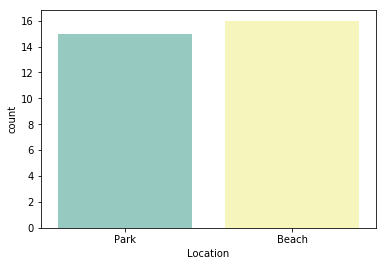

In [10]:
print(temp2.groupby(['Location'])['Location'].count())
sns.countplot(data = temp2, x='Location', palette='Set3')
plt.show()

### 실습 C.2

1. Price 0.25로 몇 번, 0.35로 몇 번, 0.5 로 몇 번 팔았는지 구하시오.
2. 효과적인 시각화 방법을 의논하고, 시각화 하시오.
3. 무엇이 문제가 될 수 있을지 토론하시오.

Price
0.25    14
0.35     6
0.50    11
Name: Price, dtype: int64


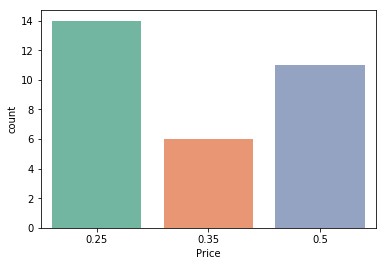

In [11]:
print(temp2.groupby(['Price'])['Price'].count())
sns.countplot(data = temp2, x = 'Price', palette='Set2')

### 실습 C.3

1. Price와 Location을 이용하여 새로운 조합을 만듭니다. 아래의 코드를 사용하면 편합니다.
```
temp2['PL'] = temp2['Location'] +'_'+ temp2['Price'].map(str)
```
2. 새로운 변수(factor) PL안의 조합별로 각각 row가 몇 번 있나요?
3. 이를 시각화 해 봅시다.
3. 무엇이 문제가 될 수 있을까요?

In [12]:
temp2['PL'] = temp2['Location'] +'_'+ temp2['Price'].map(str)

PL
Beach_0.25    11
Beach_0.35     2
Beach_0.5      3
Park_0.25      3
Park_0.35      4
Park_0.5       8
Name: PL, dtype: int64


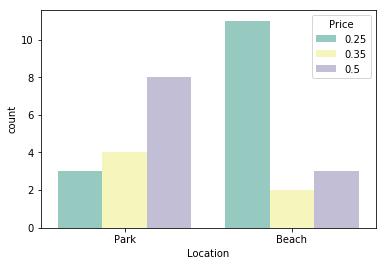

In [13]:
print(temp2.groupby('PL')['PL'].count())
sns.countplot(data=temp2, x = 'Location', hue = 'Price', palette = 'Set3')

### 실습 C.4

1. 묶은 세로 막대형 차트를 사용할 겁니다.
2. Price 별로, Lemon에이드를 '평균' 몇 개 팔았는지 시각화 하세요.
3. 범례로 Location을 두어서, 장소에 따라서 다른 막대가 표시되도록 하세요.

Q1. Location이 범례로 있기 전에는(2번 차트), 어떤 Price로 팔아야 가장 많이 팔았나요?

Q2. Location이 범례로 있을 때는(3번 차트), 장소별로 어떤 Price가 가장 많이 팔았나요?

Q3. 이는, 여러분에게 '도움'을 주는 적절한 시각화 인가요?
1. 어떤 측면에서는 도움이 되었을까요
2. 어떤 측면에서는 한계가 있을까요

In [14]:
temp2.groupby('Price')['Lemon'].mean()

Price
0.25    126.000000
0.35    106.666667
0.50    110.000000
Name: Lemon, dtype: float64

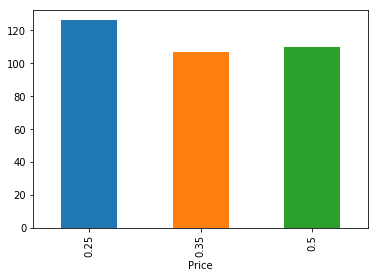

In [15]:
temp2.groupby('Price')['Lemon'].mean().plot(kind='bar')

In [16]:
a = temp2.groupby(['Price','Location'])[['Lemon']].mean().reset_index()
a

,Price,Location,Lemon
0,0.25,Beach,132.636364
1,0.25,Park,101.666667
2,0.35,Beach,82.000000
3,0.35,Park,119.000000
4,0.50,Beach,98.000000
5,0.50,Park,114.500000


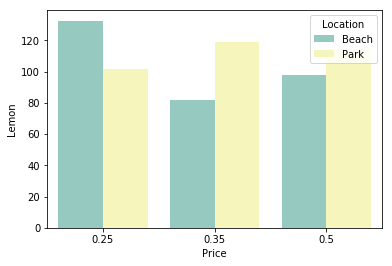

In [17]:
sns.barplot(data=a, x = 'Price', y= 'Lemon', hue='Location', palette='Set3')
plt.show()

### 실습 C.5

1. 변수 PL 안의 조합별로 레몬에이드 판매량의 평균을 구하세요.
2. 어떤 시각화 방법이 효율적일까요? 시각화하세요.
3. 실습 C.4 와 어떤 차이점이 있을까요?
    * 어떠한 상황에서 C.4의 방법이 효율적일까요?
    * 어떠한 상황에서 C.5의 방법이 효율적일까요?

In [18]:
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1,PL
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O,Park_0.25
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O,Park_0.25
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O,Park_0.25
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H,Beach_0.25
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H,Beach_0.25


In [19]:
b=temp2.groupby(['PL'])[['Lemon']].mean().reset_index()
b

,PL,Lemon
0,Beach_0.25,132.636364
1,Beach_0.35,82.000000
2,Beach_0.5,98.000000
3,Park_0.25,101.666667
4,Park_0.35,119.000000
5,Park_0.5,114.500000


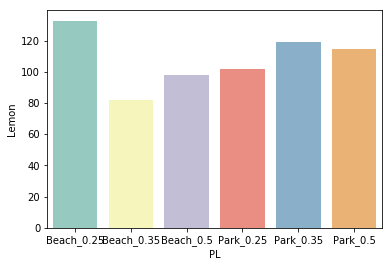

In [20]:
sns.barplot(data=b, x='PL', y='Lemon', palette='Set3')

### 실습 C.6

1. 위에서 했던 실습을 확장하여, 레몬에이드 판매량, 오렌지에이드 판매량, 온도, 리플렛에 대하여 각각 진행합니다.
2. 각각을 살펴보기에 가장 좋은 시각화 방법을 고민하고, 시각화 하세요.
    * 변수 하나만 가지고 시각화 할 수도 있고, 
    * 시계열 데이터입니다. 시간에 따라 레몬에이드가 어떻게 변화되는지 관찰할 수도 있습니다.
    
3. 레몬에이드 판매량, 오렌지에이드 판매량, 온도, 리플렛의 [평균, 중앙값, 최대값, 최소값, 표준편차]를 구하세요.

4. 온도, 리플렛 의 변동범위 안에서 데이터가 유니폼하게 분포되어있나요? histogram이 flat
    * 고르게 분포되어 있다라는 것은 데이터가 옹기종기 모여있다는 뜻입니다.
    * 유니폼하게 분포되어 있다라는 것은, 여기저기 잘 흩어져 있다는 말입니다.
    * Q1. 온도와 리플렛이 한군데에 뭉쳐져 있으면 무슨 장/단점이 있을까요?
    * Q2. 온도와 리플렛이 여기저기 흩어져 있으면 무슨 장/단점이 있을까요?
    * Q3. 시각화 없이 단순하게 알아볼만한 방법이 뭐가 있을까요? 
    
5. 판매량에 대하여 4번 문제를 고민합시다. 데이터의 변동이 큰가요 작은가요?
    * 크다고 판단했다면, 왜 인가요?
    * 작다고 판단했다면, 왜 인가요?
    
    

In [21]:
temp2.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,dayname,lemon_amt,orange_amt,...,lemon_total_cost,orange_total_cost,net_profit,x_lemon,x_orange,loss_lemon,loss_orange,loss_total,new_factor1,PL
0,2016-07-01,Park,97,67,70,90,0.25,Friday,24.25,16.75,...,10.0,7.5,23.50,103,83,5.15,4.15,9.30,O,Park_0.25
1,2016-07-02,Park,98,67,72,90,0.25,Saturday,24.50,16.75,...,10.0,7.5,23.75,102,83,5.10,4.15,9.25,O,Park_0.25
2,2016-07-03,Park,110,77,71,104,0.25,Sunday,27.50,19.25,...,10.0,7.5,29.25,90,73,4.50,3.65,8.15,O,Park_0.25
3,2016-07-04,Beach,134,99,76,98,0.25,Monday,33.50,24.75,...,10.0,7.5,40.75,66,51,3.30,2.55,5.85,H,Beach_0.25
4,2016-07-05,Beach,159,118,78,135,0.25,Tuesday,39.75,29.50,...,10.0,7.5,51.75,41,32,2.05,1.60,3.65,H,Beach_0.25


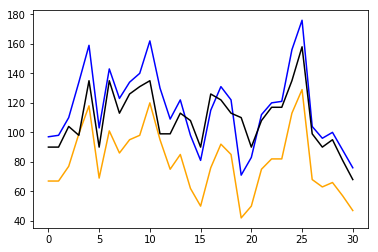

In [22]:
#temp2['Temperature'].plot(color = 'red', secondary_y=True)
temp2['Orange'].plot(color = 'orange')
temp2['Lemon'].plot(color = 'blue')
temp2['Leaflets'].plot(color = 'black')


In [23]:
temp2.iloc[:,2:6].describe()

,Lemon,Orange,Temperature,Leaflets
count,31.000000,31.000000,31.000000,31.000000
mean,116.580645,80.354839,78.870968,109.193548
std,26.136532,22.130745,4.096681,19.821570
min,71.000000,42.000000,70.000000,68.000000
25%,98.000000,66.500000,77.000000,92.500000
50%,115.000000,77.000000,80.000000,108.000000
75%,132.500000,95.000000,82.000000,124.000000
max,176.000000,129.000000,84.000000,158.000000


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


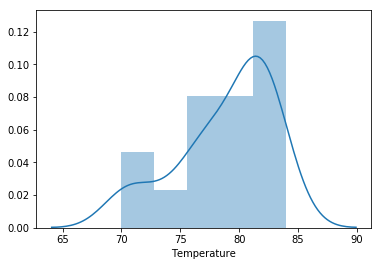

In [24]:
sns.distplot(temp2['Temperature'])

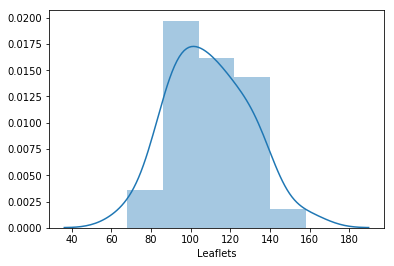

In [25]:
sns.distplot(temp2['Leaflets'])

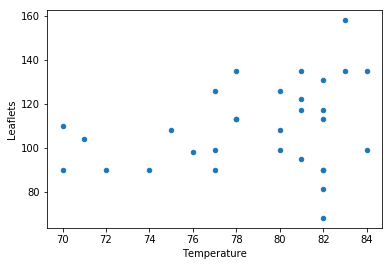

In [26]:
temp2.plot.scatter(x = 'Temperature', y ='Leaflets')